# Data Preprocessing and Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/milk_supply_and_utilization.csv')
df.head()

,Year,Month,Beginning stocks \n[A],Production [B],Farm use \n[C],Marketings \n[D] \n= [B - C],Imports \n[E],Total supply \n[F] \n= [A + D + E],Exports [G],Ending stocks [H],Domestic disappearance\n[I] \n= [F - G - H]
0,2011,Jan,10053,16396,81.958904,16314.041096,238,26605.041096,638,10918,15049.041096
1,2011,Feb,10918,15075,74.027397,15000.972603,221,26139.972603,762,11273,14104.972603
2,2011,Mar,11273,16990,81.958904,16908.041096,299,28480.041096,958,11487,16035.041096
3,2011,Apr,11487,16657,79.315068,16577.684932,243,28307.684932,887,11689,15731.684932
4,2011,May,11689,17279,81.958904,17197.041096,212,29098.041096,877,12556,15665.041096


In [3]:
# Renaming the columns
df.columns = [
    'Year', 'Month', 'Beginning stocks', 'Production',
    'Farm use', 'Marketings', 'Imports',
    'Total supply', 'Exports', 'Ending stocks',
    'Domestic disappearance'
]

# Display the updated DataFrame
df.head()


,Year,Month,Beginning stocks,Production,Farm use,Marketings,Imports,Total supply,Exports,Ending stocks,Domestic disappearance
0,2011,Jan,10053,16396,81.958904,16314.041096,238,26605.041096,638,10918,15049.041096
1,2011,Feb,10918,15075,74.027397,15000.972603,221,26139.972603,762,11273,14104.972603
2,2011,Mar,11273,16990,81.958904,16908.041096,299,28480.041096,958,11487,16035.041096
3,2011,Apr,11487,16657,79.315068,16577.684932,243,28307.684932,887,11689,15731.684932
4,2011,May,11689,17279,81.958904,17197.041096,212,29098.041096,877,12556,15665.041096


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    164 non-null    int64  
 1   Month                   164 non-null    object 
 2   Beginning stocks        164 non-null    int64  
 3   Production              164 non-null    int64  
 4   Farm use                164 non-null    float64
 5   Marketings              164 non-null    float64
 6   Imports                 164 non-null    int64  
 7   Total supply            164 non-null    float64
 8   Exports                 164 non-null    int64  
 9   Ending stocks           164 non-null    int64  
 10  Domestic disappearance  164 non-null    float64
dtypes: float64(4), int64(6), object(1)
memory usage: 14.2+ KB


In [5]:
# Combine Year and Month into a new 'Date' column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'] + '-01')

# Display the updated DataFrame
df.head(20)

,Year,Month,Beginning stocks,Production,Farm use,Marketings,Imports,Total supply,Exports,Ending stocks,Domestic disappearance,Date
0,2011,Jan,10053,16396,81.958904,16314.041096,238,26605.041096,638,10918,15049.041096,2011-01-01
1,2011,Feb,10918,15075,74.027397,15000.972603,221,26139.972603,762,11273,14104.972603,2011-02-01
2,2011,Mar,11273,16990,81.958904,16908.041096,299,28480.041096,958,11487,16035.041096,2011-03-01
3,2011,Apr,11487,16657,79.315068,16577.684932,243,28307.684932,887,11689,15731.684932,2011-04-01
4,2011,May,11689,17279,81.958904,17197.041096,212,29098.041096,877,12556,15665.041096,2011-05-01
5,2011,Jun,12556,16514,79.315068,16434.684932,238,29228.684932,838,13264,15126.684932,2011-06-01
6,2011,Jul,13264,16478,81.958904,16396.041096,280,29940.041096,734,13670,15536.041096,2011-07-01
7,2011,Aug,13670,16425,81.958904,16343.041096,275,30288.041096,781,13003,16504.041096,2011-08-01
8,2011,Sep,13003,15780,79.315068,15700.684932,250,28953.684932,595,12225,16133.684932,2011-09-01
9,2011,Oct,12225,16272,81.958904,16190.041096,356,28771.041096,615,11207,16949.041096,2011-10-01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Year                    164 non-null    int64         
 1   Month                   164 non-null    object        
 2   Beginning stocks        164 non-null    int64         
 3   Production              164 non-null    int64         
 4   Farm use                164 non-null    float64       
 5   Marketings              164 non-null    float64       
 6   Imports                 164 non-null    int64         
 7   Total supply            164 non-null    float64       
 8   Exports                 164 non-null    int64         
 9   Ending stocks           164 non-null    int64         
 10  Domestic disappearance  164 non-null    float64       
 11  Date                    164 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(6), object

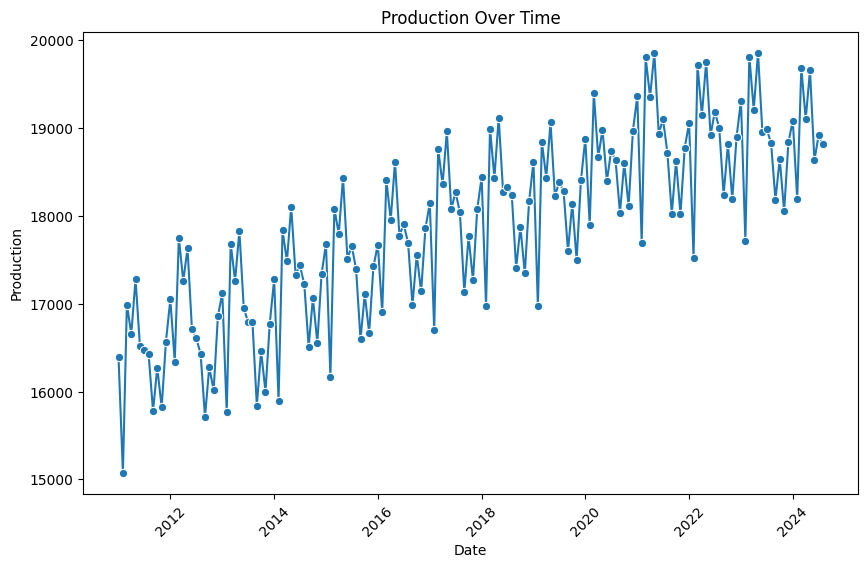

In [11]:
# Production Over Time
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Date', y='Production', marker='o')
plt.title('Production Over Time')
plt.xlabel('Date')
plt.ylabel('Production')
plt.xticks(rotation=45)
plt.show()

<ipython-input-8-4123b4b3b795>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Month', y='Ending stocks', palette='viridis')


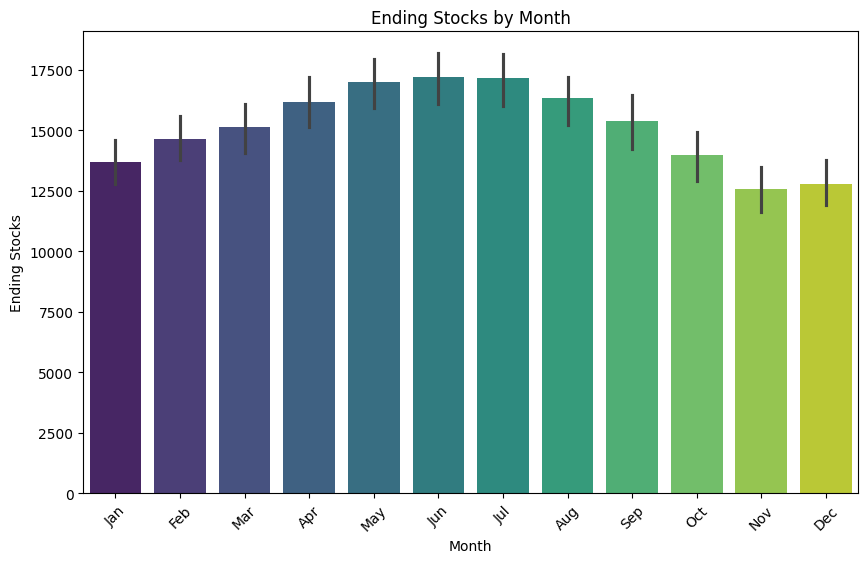

In [8]:
# Ending Stocks by Month
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Month', y='Ending stocks', palette='viridis')
plt.title('Ending Stocks by Month')
plt.xlabel('Month')
plt.ylabel('Ending Stocks')
plt.xticks(rotation=45)
plt.show()


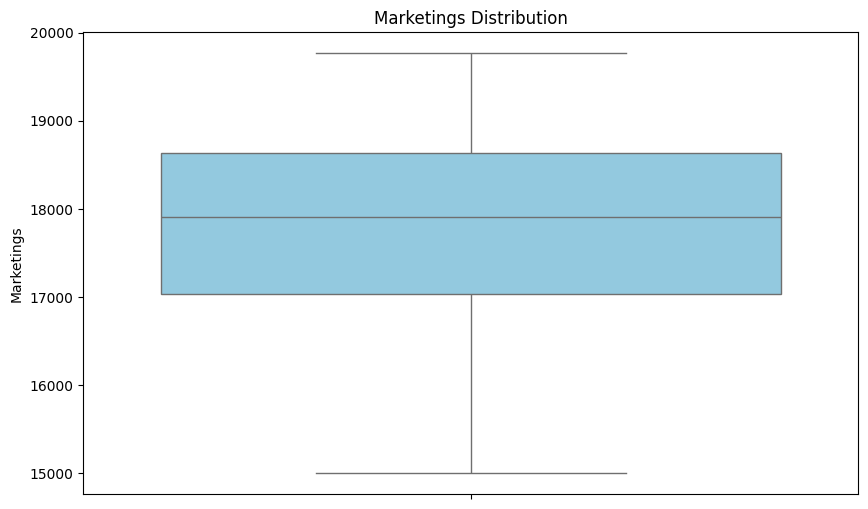

In [9]:
# Distribution of Marketings
plt.figure(figsize=(10,6))
sns.boxplot(data=df, y='Marketings', color='skyblue')
plt.title('Marketings Distribution')
plt.ylabel('Marketings')
plt.show()


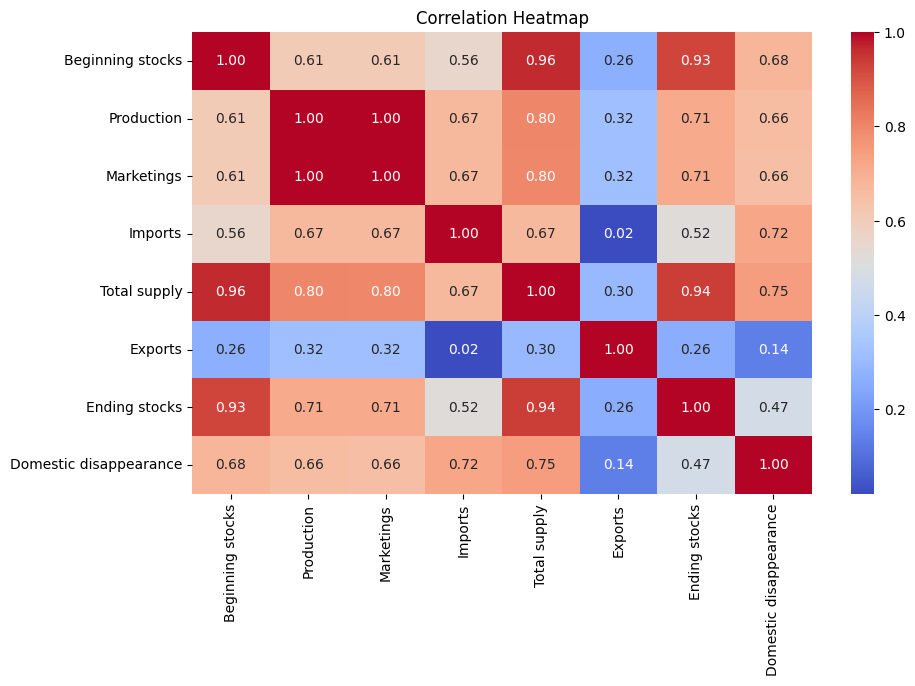

In [13]:
# Correlation Heatmap
corr = df[['Beginning stocks', 'Production', 'Marketings', 'Imports', 'Total supply', 'Exports', 'Ending stocks', 'Domestic disappearance']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap reveals strong relationships between key variables in the dataset. Beginning and ending stocks show a high positive correlation (0.93), indicating that the starting inventory closely predicts the ending inventory. Production and marketing efforts are also strongly linked (0.80), suggesting that higher production leads to increased marketings. Total supply is positively correlated with both ending stocks (0.94) and domestic disappearance (0.75), highlighting its impact on these factors. Imports show a moderate correlation with domestic disappearance (0.72), implying that higher imports influence consumption levels.

Exports have weak correlations with other variables, showing minimal influence on production, marketings, and supply levels, suggesting that exports are relatively independent. While production, marketing, and total supply are strongly connected, exports seem less affected by these factors. Overall, the heatmap provides insights into stock management, forecasting, and the relationships between production, marketing, and supply factors.

# Arima Model

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set Date as the index
df.set_index('Date', inplace=True)


## Perform ADF test to check for stationarity

In [8]:
# Perform ADF test to check for stationarity
result = adfuller(df['Total supply'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -1.3399537072117869
p-value: 0.610701111284277


## Plot ACF and PACF to determine p and q

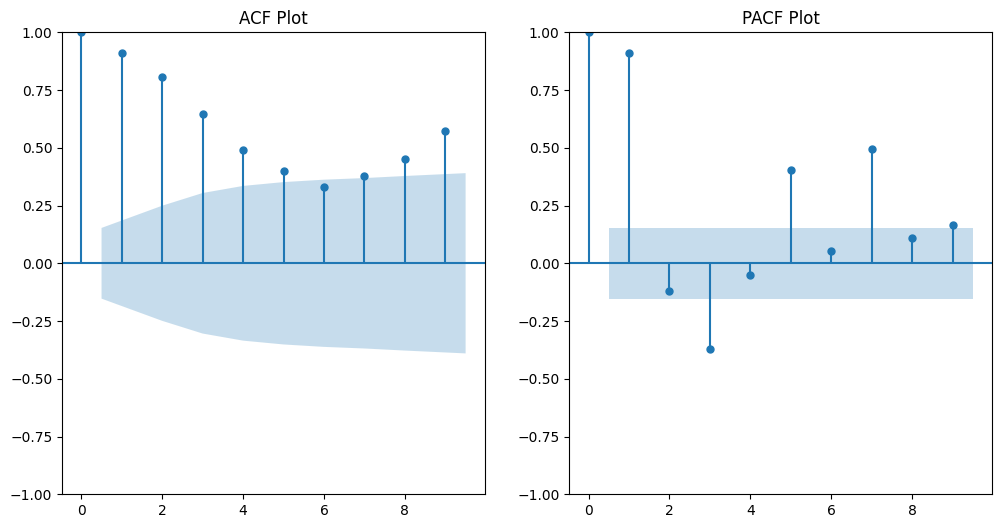

In [9]:
# Plot ACF and PACF to determine p and q
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Total supply'].dropna(), ax=plt.gca(), lags=9)
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(df['Total supply'].dropna(), ax=plt.gca(), lags=9)
plt.title('PACF Plot')
plt.show()


In [10]:
# Apply differencing if non-stationary
df['Differenced Total supply'] = df['Total supply'].diff()

# Check for stationarity after differencing
result_differenced = adfuller(df['Differenced Total supply'].dropna())
print('ADF Statistic after Differencing:', result_differenced[0])
print('p-value after Differencing:', result_differenced[1])


ADF Statistic after Differencing: -3.291937987562436
p-value after Differencing: 0.01524271535331003


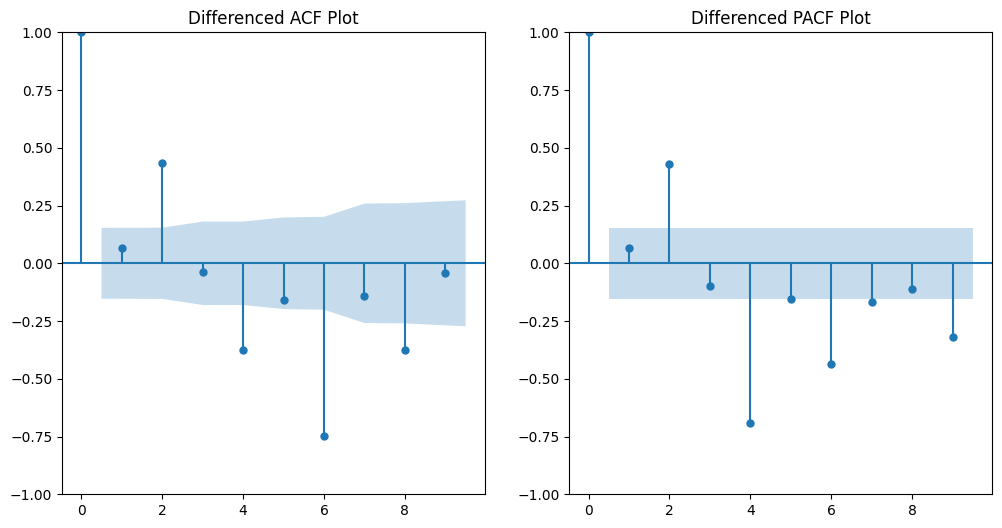

In [11]:
# Plot ACF and PACF to determine p and q
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Differenced Total supply'].dropna(), ax=plt.gca(), lags=9)
plt.title('Differenced ACF Plot')

plt.subplot(122)
plot_pacf(df['Differenced Total supply'].dropna(), ax=plt.gca(), lags=9)
plt.title('Differenced PACF Plot')
plt.show()


In [12]:
# Fit ARIMA model (adjust p, d, q parameters as needed)
model_arima = ARIMA(df['Total supply'], order=(5, 0, 1))
model_arima_fit = model_arima.fit()

# Make forecast
forecast_arima = model_arima_fit.forecast(steps=24)  # Forecasting the next 24 periods

# Print the summary of the ARIMA model
print(model_arima_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Total supply   No. Observations:                  164
Model:                 ARIMA(5, 0, 1)   Log Likelihood               -1322.978
Date:                Sat, 30 Nov 2024   AIC                           2661.956
Time:                        15:41:42   BIC                           2686.755
Sample:                    01-01-2011   HQIC                          2672.023
                         - 08-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.345e+04   4081.115      8.197      0.000    2.55e+04    4.15e+04
ar.L1          1.2950      0.100     12.982      0.000       1.100       1.491
ar.L2          0.4105      0.175      2.349      0.0

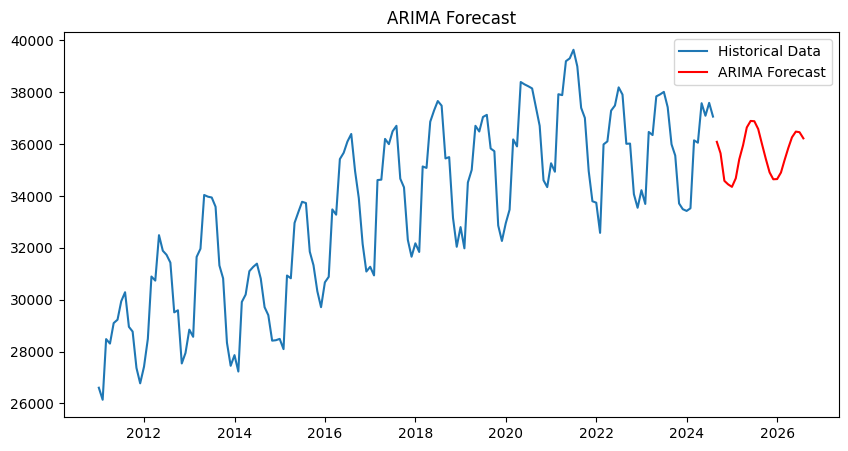

In [13]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(df['Total supply'], label='Historical Data')
plt.plot(forecast_arima, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()


In [14]:
# Display the forecasted values
print("Forecasted Values:")
print(forecast_arima)


Forecasted Values:
2024-09-01    36089.024605
2024-10-01    35646.168397
2024-11-01    34584.370977
2024-12-01    34449.248440
2025-01-01    34351.977763
2025-02-01    34681.991664
2025-03-01    35412.656210
2025-04-01    35961.055752
2025-05-01    36643.529812
2025-06-01    36894.787330
2025-07-01    36883.670135
2025-08-01    36584.294932
2025-09-01    35997.868541
2025-10-01    35443.442749
2025-11-01    34912.478208
2025-12-01    34644.867938
2026-01-01    34652.624252
2026-02-01    34904.630142
2026-03-01    35365.876154
2026-04-01    35846.988085
2026-05-01    36263.986776
2026-06-01    36483.565090
2026-07-01    36460.390175
2026-08-01    36222.695998
Freq: MS, Name: predicted_mean, dtype: float64


# Exponential Smoothing Model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


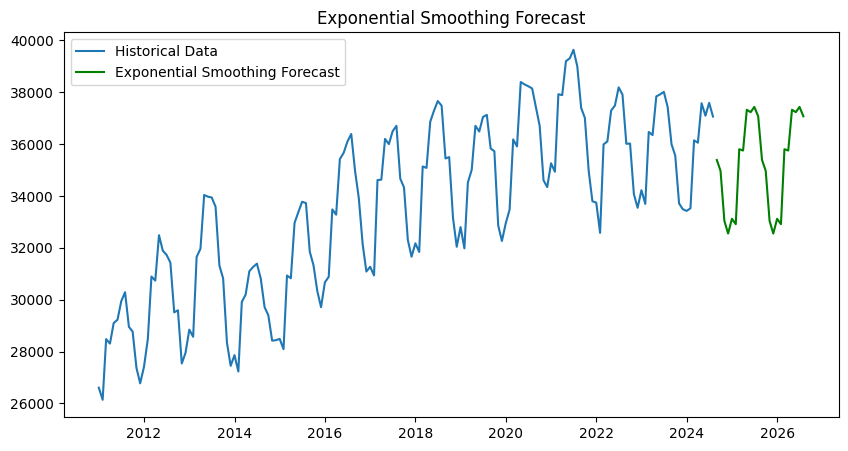

In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Exponential Smoothing model
model_exp = ExponentialSmoothing(df['Total supply'], seasonal='add', seasonal_periods=12)
model_exp_fit = model_exp.fit()

# Make forecast
forecast_exp = model_exp_fit.forecast(steps=24)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(df['Total supply'], label='Historical Data')
plt.plot(forecast_exp, label='Exponential Smoothing Forecast', color='green')
plt.title('Exponential Smoothing Forecast')
plt.legend()
plt.show()


In [16]:
# Display the forecasted values
print("Exponential Smoothing Forecasted Values:")
print(forecast_exp)


Exponential Smoothing Forecasted Values:
2024-09-01    35388.733439
2024-10-01    34967.008282
2024-11-01    33038.695394
2024-12-01    32551.419742
2025-01-01    33120.012739
2025-02-01    32912.811606
2025-03-01    35804.222829
2025-04-01    35753.742631
2025-05-01    37325.430193
2025-06-01    37233.977707
2025-07-01    37436.372135
2025-08-01    37073.466482
2025-09-01    35388.733439
2025-10-01    34967.008282
2025-11-01    33038.695394
2025-12-01    32551.419742
2026-01-01    33120.012739
2026-02-01    32912.811606
2026-03-01    35804.222829
2026-04-01    35753.742631
2026-05-01    37325.430193
2026-06-01    37233.977707
2026-07-01    37436.372135
2026-08-01    37073.466482
Freq: MS, dtype: float64


# Prophet Model

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpainoe9v_/vonb5xta.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpainoe9v_/6z6ra0ok.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29727', 'data', 'file=/tmp/tmpainoe9v_/vonb5xta.json', 'init=/tmp/tmpainoe9v_/6z6ra0ok.json', 'output', 'file=/tmp/tmpainoe9v_/prophet_model_mghwuz0/prophet_model-20241130154147.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:41:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:41:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

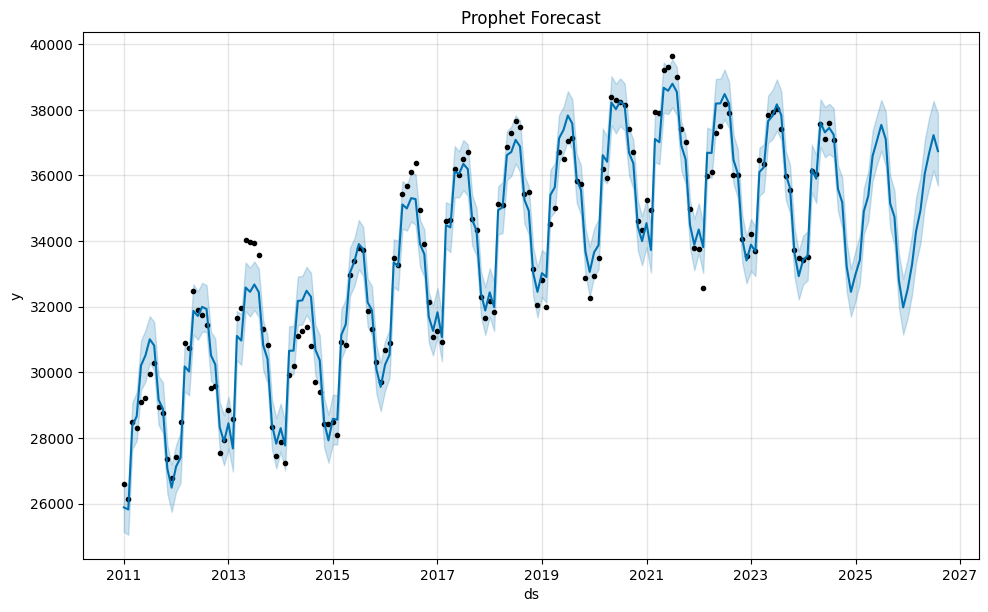

In [17]:
from prophet import Prophet

# Prepare data for Prophet
prophet_data = df.reset_index()[['Date', 'Total supply']]
prophet_data.columns = ['ds', 'y']

# Fit Prophet model
model_prophet = Prophet()
model_prophet.fit(prophet_data)

# Make future dataframe for forecasting
future = model_prophet.make_future_dataframe(periods=24, freq='M')  # Forecasting next 24 months
forecast_prophet = model_prophet.predict(future)

# Plot the results
model_prophet.plot(forecast_prophet)
plt.title('Prophet Forecast')
plt.show()


In [18]:
# Display the forecasted values
print("Prophet Forecasted Values:")
print(forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24))  # Display only future forecasts


Prophet Forecasted Values:
            ds          yhat    yhat_lower    yhat_upper
164 2024-08-31  35587.642443  34912.917921  36306.530477
165 2024-09-30  35177.100472  34387.394130  35935.352713
166 2024-10-31  33221.698925  32463.502211  33976.017108
167 2024-11-30  32451.193043  31699.105274  33157.621796
168 2024-12-31  32975.518546  32161.223795  33696.037329
169 2025-01-31  33417.539810  32694.943519  34172.917753
170 2025-02-28  34904.976447  34212.192974  35608.407608
171 2025-03-31  35373.443932  34603.959313  36121.450449
172 2025-04-30  36586.347150  35822.477547  37349.187648
173 2025-05-31  37062.325731  36320.949731  37840.071337
174 2025-06-30  37538.560905  36752.315402  38295.741650
175 2025-07-31  37104.461329  36292.015128  37954.672922
176 2025-08-31  35143.363207  34381.302255  35992.946737
177 2025-09-30  34737.320279  33869.582242  35543.799411
178 2025-10-31  32799.175974  31990.261572  33615.229289
179 2025-11-30  31975.777570  31152.567596  32853.440922
180 

In [19]:
# Convert Prophet forecast to DataFrame for further analysis
forecast_prophet_df = forecast_prophet[['ds', 'yhat']].tail(24)  # Get only the next 12 months
forecast_prophet_df.columns = ['Date', 'Forecasted Total Supply']

# Display forecast DataFrame
print(forecast_prophet_df)


          Date  Forecasted Total Supply
164 2024-08-31             35587.642443
165 2024-09-30             35177.100472
166 2024-10-31             33221.698925
167 2024-11-30             32451.193043
168 2024-12-31             32975.518546
169 2025-01-31             33417.539810
170 2025-02-28             34904.976447
171 2025-03-31             35373.443932
172 2025-04-30             36586.347150
173 2025-05-31             37062.325731
174 2025-06-30             37538.560905
175 2025-07-31             37104.461329
176 2025-08-31             35143.363207
177 2025-09-30             34737.320279
178 2025-10-31             32799.175974
179 2025-11-30             31975.777570
180 2025-12-31             32526.705160
181 2026-01-31             33284.940383
182 2026-02-28             34301.331371
183 2026-03-31             34936.948923
184 2026-04-30             36056.205282
185 2026-05-31             36692.427434
186 2026-06-30             37225.571521
187 2026-07-31             36737.729228


# Combination of the 3 models

In [30]:
print(forecast_prophet.head())


164    35587.642443
165    35177.100472
166    33221.698925
167    32451.193043
168    32975.518546
Name: Forecasted Total Supply, dtype: float64


In [34]:
# Combine forecasts into a single DataFrame
combined_forecasts = pd.DataFrame({
    'Date': forecast_prophet_df['Date'],
    'ARIMA Forecast': forecast_arima.values,
    'Exponential Smoothing Forecast': forecast_exp.values,
    'Prophet Forecast': forecast_prophet_df['Forecasted Total Supply'].values
})

# Display combined forecast DataFrame
combined_forecasts


,Date,ARIMA Forecast,Exponential Smoothing Forecast,Prophet Forecast
164,2024-08-31,36089.024605,35388.733439,35587.642443
165,2024-09-30,35646.168397,34967.008282,35177.100472
166,2024-10-31,34584.370977,33038.695394,33221.698925
167,2024-11-30,34449.248440,32551.419742,32451.193043
168,2024-12-31,34351.977763,33120.012739,32975.518546
169,2025-01-31,34681.991664,32912.811606,33417.539810
170,2025-02-28,35412.656210,35804.222829,34904.976447
171,2025-03-31,35961.055752,35753.742631,35373.443932
172,2025-04-30,36643.529812,37325.430193,36586.347150
173,2025-05-31,36894.787330,37233.977707,37062.325731


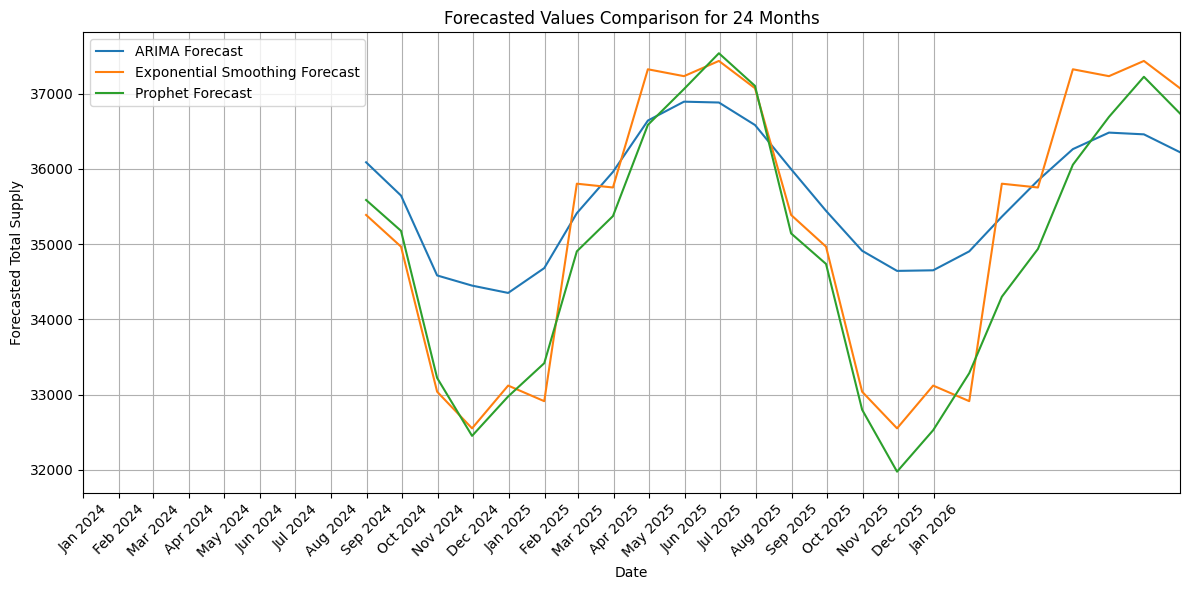

In [21]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot each forecast without markers
plt.plot(combined_forecasts['Date'], combined_forecasts['ARIMA Forecast'], label='ARIMA Forecast')
plt.plot(combined_forecasts['Date'], combined_forecasts['Exponential Smoothing Forecast'], label='Exponential Smoothing Forecast')
plt.plot(combined_forecasts['Date'], combined_forecasts['Prophet Forecast'], label='Prophet Forecast')

# Add title and labels
plt.title('Forecasted Values Comparison for 24 Months')
plt.xlabel('Date')
plt.ylabel('Forecasted Total Supply')

# Set x-axis limits to cover the full year (
plt.xlim([combined_forecasts['Date'].min(), combined_forecasts['Date'].max()])

# Improve x-tick formatting for better readability
plt.xticks(rotation=45)
plt.xticks(pd.date_range(start='2024-01-01', end='2026-01-01', freq='MS'),
           [date.strftime('%b %Y') for date in pd.date_range(start='2024-01-01', end='2026-01-01', freq='MS')])

plt.legend()

# Show grid
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

test_data = df['Total supply'][-24:]  # Use the last 24 observations as test data

# Ensure forecast lengths match test data
forecast_arima = forecast_arima[:len(test_data)]
forecast_exp = forecast_exp[:len(test_data)]
forecast_prophet = forecast_prophet_df['Forecasted Total Supply'][:len(test_data)]

# Evaluate ARIMA model
mae_arima = mean_absolute_error(test_data, forecast_arima)
mse_arima = mean_squared_error(test_data, forecast_arima)
rmse_arima = np.sqrt(mse_arima)

# Evaluate Exponential Smoothing model
mae_exp = mean_absolute_error(test_data, forecast_exp)
mse_exp = mean_squared_error(test_data, forecast_exp)
rmse_exp = np.sqrt(mse_exp)

# Evaluate Prophet model
mae_prophet = mean_absolute_error(test_data, forecast_prophet)
mse_prophet = mean_squared_error(test_data, forecast_prophet)
rmse_prophet = np.sqrt(mse_prophet)

# Display results
print("ARIMA Evaluation Metrics:")
print(f"MAE: {mae_arima}, MSE: {mse_arima}, RMSE: {rmse_arima}")

print("\nExponential Smoothing Evaluation Metrics:")
print(f"MAE: {mae_exp}, MSE: {mse_exp}, RMSE: {rmse_exp}")

print("\nProphet Evaluation Metrics:")
print(f"MAE: {mae_prophet}, MSE: {mse_prophet}, RMSE: {rmse_prophet}")


ARIMA Evaluation Metrics:
MAE: 774.806386977064, MSE: 787501.456120063, RMSE: 887.4127878952743

Exponential Smoothing Evaluation Metrics:
MAE: 579.7249628547912, MSE: 425597.5166093631, RMSE: 652.3783538786087

Prophet Evaluation Metrics:
MAE: 875.3554251049949, MSE: 968915.4478456234, RMSE: 984.3350282528928


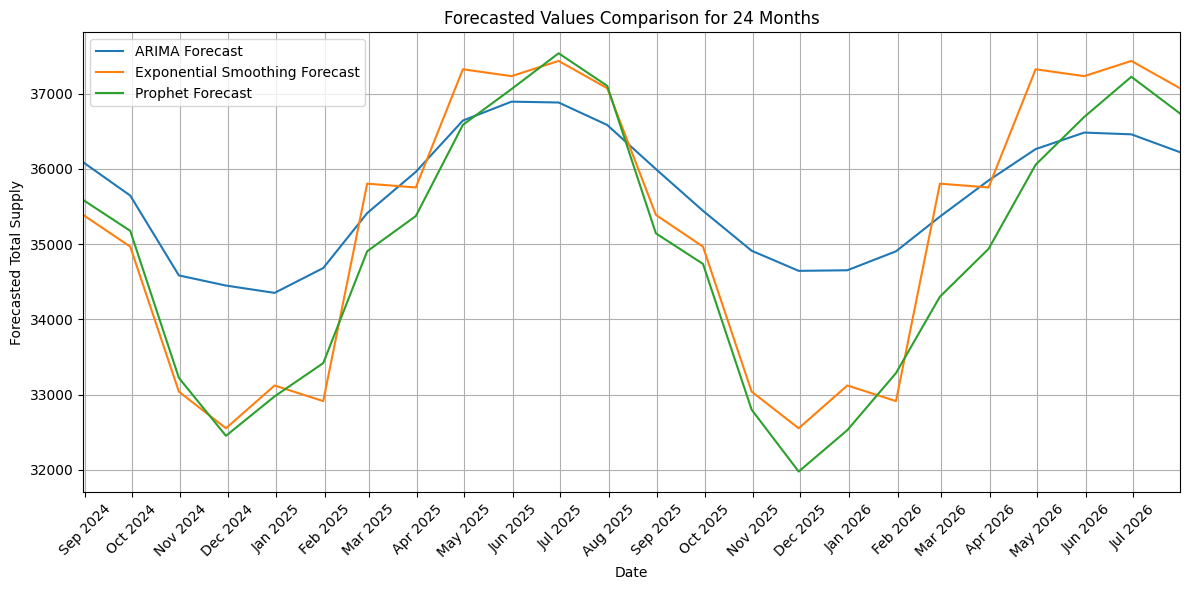

In [23]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot each forecast without markers
plt.plot(combined_forecasts['Date'], combined_forecasts['ARIMA Forecast'], label='ARIMA Forecast')
plt.plot(combined_forecasts['Date'], combined_forecasts['Exponential Smoothing Forecast'], label='Exponential Smoothing Forecast')
plt.plot(combined_forecasts['Date'], combined_forecasts['Prophet Forecast'], label='Prophet Forecast')

# Add title and labels
plt.title('Forecasted Values Comparison for 24 Months')
plt.xlabel('Date')
plt.ylabel('Forecasted Total Supply')

# Improve x-tick formatting for better readability
plt.xticks(rotation=45)
plt.xticks(pd.date_range(start='2024-08-01', end='2026-08-01', freq='MS'),
           [date.strftime('%b %Y') for date in pd.date_range(start='2024-08-01', end='2026-08-01', freq='MS')])

# Add x-axis limits to cover the full forecast range
plt.xlim([combined_forecasts['Date'].min(), combined_forecasts['Date'].max()])

plt.legend()

# Show grid
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()

# Hybrid Model Forcast

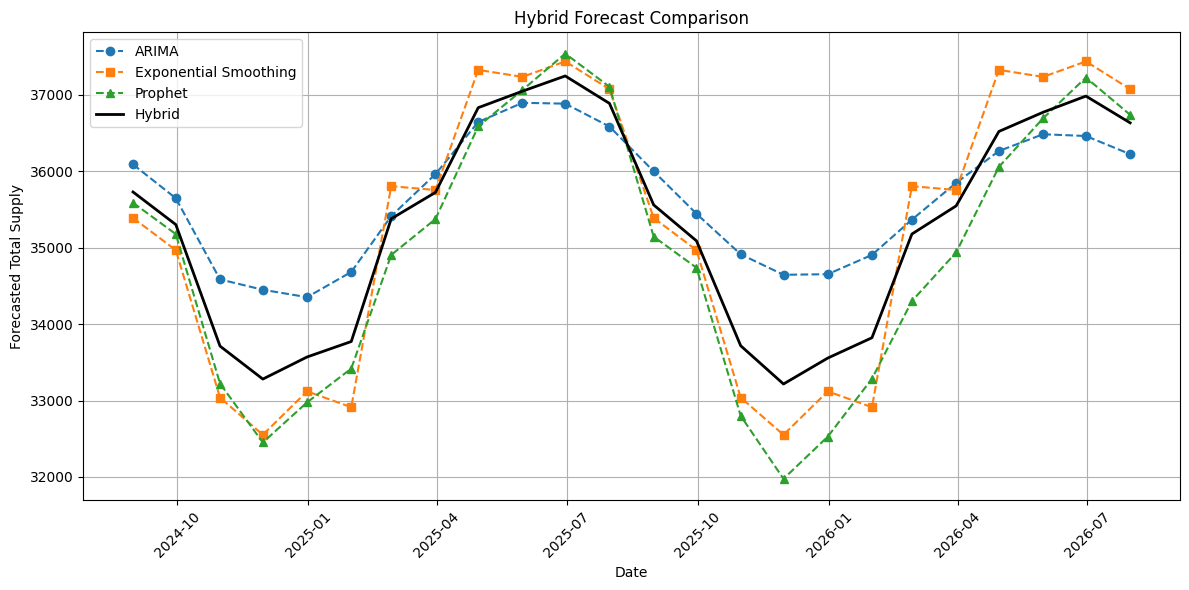

In [39]:
# Hybrid forecast as weighted average
w_arima, w_exp, w_prophet = 0.4, 0.3, 0.3
combined_forecasts['Hybrid'] = (
    w_arima * combined_forecasts['ARIMA Forecast'] +
    w_exp * combined_forecasts['Exponential Smoothing Forecast'] +
    w_prophet * combined_forecasts['Prophet Forecast']
)

# Plot hybrid and individual forecasts
plt.figure(figsize=(12, 6))
plt.plot(combined_forecasts['Date'], combined_forecasts['ARIMA Forecast'], label='ARIMA', linestyle='--', marker='o')
plt.plot(combined_forecasts['Date'], combined_forecasts['Exponential Smoothing Forecast'], label='Exponential Smoothing', linestyle='--', marker='s')
plt.plot(combined_forecasts['Date'], combined_forecasts['Prophet Forecast'], label='Prophet', linestyle='--', marker='^')
plt.plot(combined_forecasts['Date'], combined_forecasts['Hybrid'], label='Hybrid', linestyle='-', linewidth=2, color='black')

plt.title('Hybrid Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Forecasted Total Supply')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

actuals = df['Total supply'][-24:].values  # Last 24 periods as actuals
arima_forecast = combined_forecasts['ARIMA Forecast'].values
exp_smoothing_forecast = combined_forecasts['Exponential Smoothing Forecast'].values
prophet_forecast = combined_forecasts['Prophet Forecast'].values
hybrid_forecast = combined_forecasts['Hybrid'].values

# Calculate MAE, MSE, and RMSE for each forecast
evaluation_metrics = {
    'ARIMA': {
        'MAE': mean_absolute_error(actuals, arima_forecast),
        'MSE': mean_squared_error(actuals, arima_forecast),
        'RMSE': np.sqrt(mean_squared_error(actuals, arima_forecast))
    },
    'Exponential Smoothing': {
        'MAE': mean_absolute_error(actuals, exp_smoothing_forecast),
        'MSE': mean_squared_error(actuals, exp_smoothing_forecast),
        'RMSE': np.sqrt(mean_squared_error(actuals, exp_smoothing_forecast))
    },
    'Prophet': {
        'MAE': mean_absolute_error(actuals, prophet_forecast),
        'MSE': mean_squared_error(actuals, prophet_forecast),
        'RMSE': np.sqrt(mean_squared_error(actuals, prophet_forecast))
    },
    'Hybrid': {
        'MAE': mean_absolute_error(actuals, hybrid_forecast),
        'MSE': mean_squared_error(actuals, hybrid_forecast),
        'RMSE': np.sqrt(mean_squared_error(actuals, hybrid_forecast))
    }
}

# Display evaluation results
for model, metrics in evaluation_metrics.items():
    print(f"\nModel: {model}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")



Model: ARIMA
  MAE: 774.8064
  MSE: 787501.4561
  RMSE: 887.4128

Model: Exponential Smoothing
  MAE: 579.7250
  MSE: 425597.5166
  RMSE: 652.3784

Model: Prophet
  MAE: 875.3554
  MSE: 968915.4478
  RMSE: 984.3350

Model: Hybrid
  MAE: 532.5945
  MSE: 377170.5005
  RMSE: 614.1421


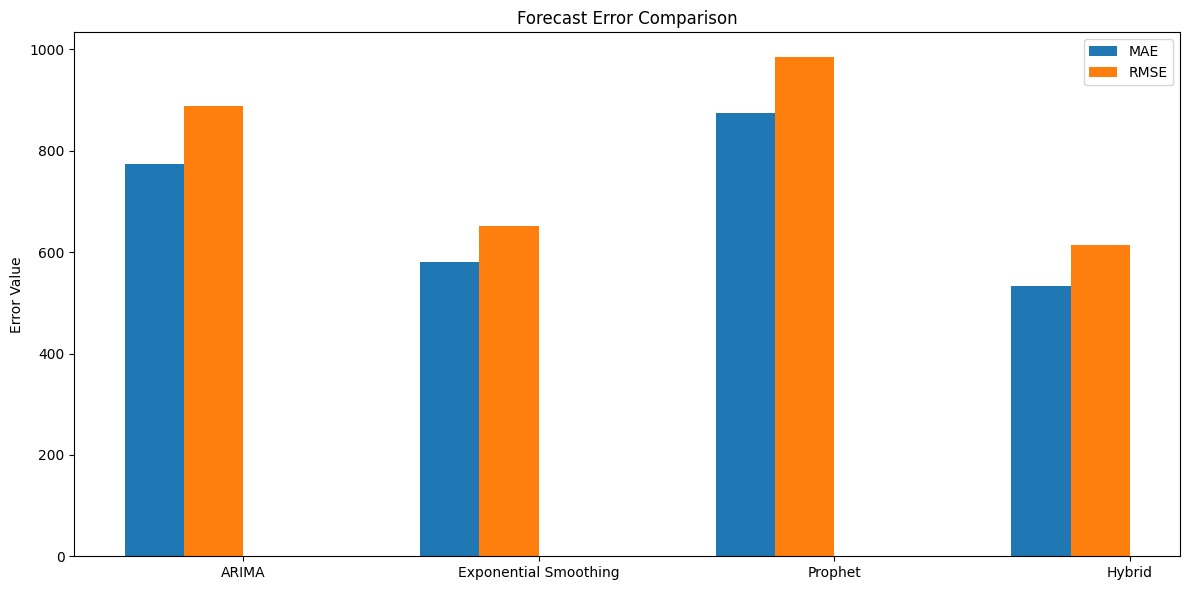

In [45]:
import matplotlib.pyplot as plt

# Prepare data for plotting
metric_names = ['MAE', 'RMSE']
models = ['ARIMA', 'Exponential Smoothing', 'Prophet', 'Hybrid']
values = {metric: [evaluation_metrics[model][metric] for model in models] for metric in metric_names}

# Plot metrics
plt.figure(figsize=(12, 6))
x = range(len(models))
for i, metric in enumerate(metric_names):
    plt.bar([p + i*0.2 for p in x], values[metric], width=0.2, label=metric)

plt.xticks([p + 0.3 for p in x], models)
plt.ylabel('Error Value')
plt.title('Forecast Error Comparison')
plt.legend()
plt.tight_layout()
plt.show()


# Forecasting Production Needs

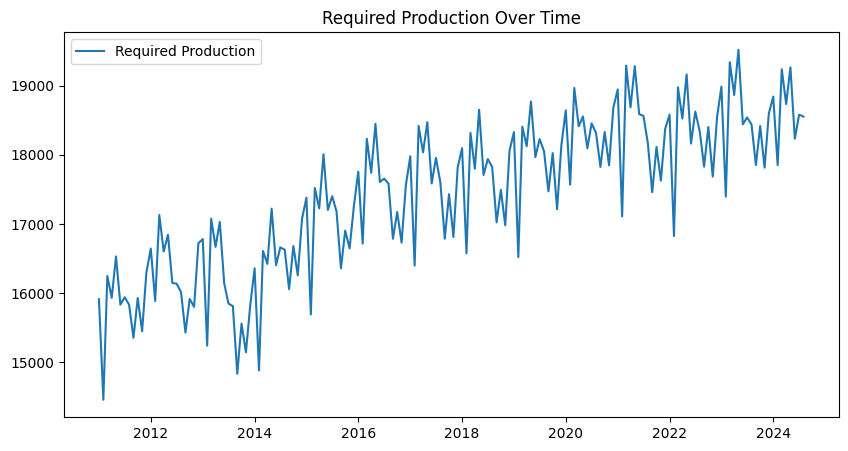

In [ ]:
# Calculate the required production
df['Required Production'] = df['Total supply'] - df['Beginning stocks'] - df['Exports']

# Display the updated DataFrame with Required Production
df.head()

# Visualize the Required Production
plt.figure(figsize=(10, 5))
plt.plot(df['Required Production'], label='Required Production')
plt.title('Required Production Over Time')
plt.legend()
plt.show()


# Forecasting with ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


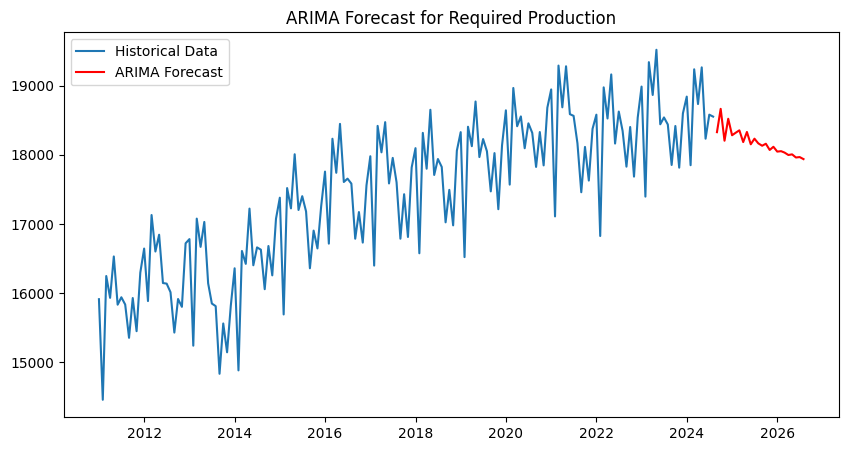

In [ ]:
# Fit ARIMA model to the Required Production
model_arima = ARIMA(df['Required Production'], order=(5, 0, 1))
model_arima_fit = model_arima.fit()

# Forecast the next 24 months
forecast_arima = model_arima_fit.forecast(steps=24)

# Plot the ARIMA forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Required Production'], label='Historical Data')
plt.plot(forecast_arima, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast for Required Production')
plt.legend()
plt.show()

# Forecasting with Exponential Smoothing

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


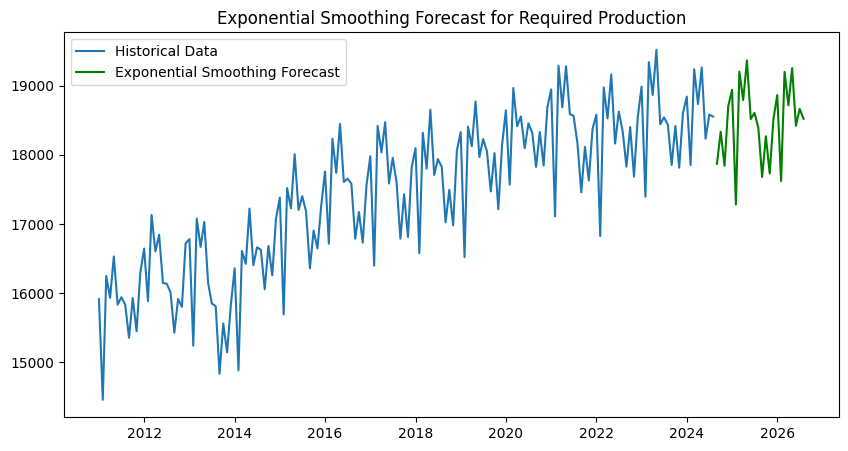

In [ ]:
# Fit Exponential Smoothing model to the Required Production
model_exp = ExponentialSmoothing(df['Required Production'], seasonal='add', seasonal_periods=24)
model_exp_fit = model_exp.fit()

# Forecast the next 12 months
forecast_exp = model_exp_fit.forecast(steps=24)

# Plot the Exponential Smoothing forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Required Production'], label='Historical Data')
plt.plot(forecast_exp, label='Exponential Smoothing Forecast', color='green')
plt.title('Exponential Smoothing Forecast for Required Production')
plt.legend()
plt.show()


# Forecasting with Prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn6cfinn1/5484tzbe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn6cfinn1/quyg81_5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89180', 'data', 'file=/tmp/tmpn6cfinn1/5484tzbe.json', 'init=/tmp/tmpn6cfinn1/quyg81_5.json', 'output', 'file=/tmp/tmpn6cfinn1/prophet_modelc1p0wx0h/prophet_model-20241125064906.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:49:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:49:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

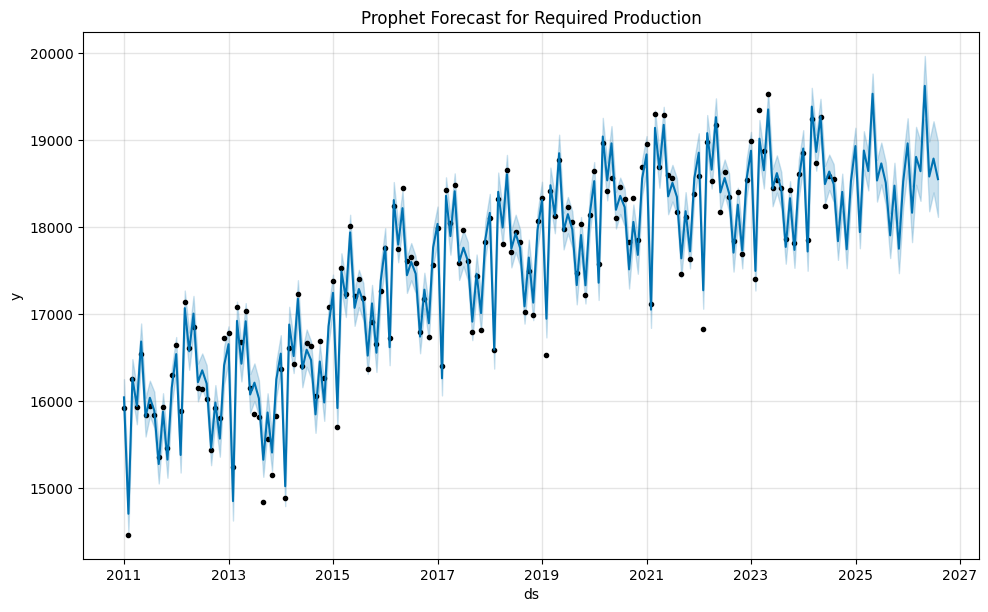

In [ ]:
# Prepare the data for Prophet
prophet_data = df.reset_index()[['Date', 'Required Production']]
prophet_data.columns = ['ds', 'y']

# Fit the Prophet model
model_prophet = Prophet()
model_prophet.fit(prophet_data)

# Make future dataframe for forecasting
future = model_prophet.make_future_dataframe(periods=24, freq='M')
forecast_prophet = model_prophet.predict(future)

# Plot the Prophet forecast
model_prophet.plot(forecast_prophet)
plt.title('Prophet Forecast for Required Production')
plt.show()

In [ ]:
# Display the forecasted values from Prophet
print("Prophet Forecasted Values:")
print(forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24))


Prophet Forecasted Values:
            ds          yhat    yhat_lower    yhat_upper
164 2024-08-31  17833.851357  17618.987024  18052.828822
165 2024-09-30  18400.496737  18181.760288  18609.937166
166 2024-10-31  17740.767869  17522.653114  17944.356551
167 2024-11-30  18526.393508  18321.816484  18742.451862
168 2024-12-31  18926.883372  18716.978979  19137.465368
169 2025-01-31  17937.991169  17752.149658  18142.893169
170 2025-02-28  18875.353218  18656.016192  19097.266102
171 2025-03-31  18639.663467  18417.090644  18863.320739
172 2025-04-30  19527.965763  19319.575595  19759.752095
173 2025-05-31  18531.056689  18288.752983  18768.089390
174 2025-06-30  18727.509209  18486.058086  18966.922282
175 2025-07-31  18505.808245  18252.361878  18742.444106
176 2025-08-31  17900.336998  17639.966892  18155.202962
177 2025-09-30  18471.867086  18200.652673  18734.959529
178 2025-10-31  17747.006761  17466.310423  18041.551875
179 2025-11-30  18518.039559  18221.224368  18800.189169
180 

In [ ]:
# Ensure all forecasts cover the same date range and length
forecast_length = 24  # Assuming we're forecasting for 24 months

# Extract the forecasted dates from Prophet
forecast_prophet_trimmed = forecast_prophet.tail(forecast_length)

# Extract ARIMA and Exponential Smoothing forecasts for the same period
forecast_arima_trimmed = forecast_arima.tail(forecast_length)  # Ensure ARIMA forecast is the same length
forecast_exp_trimmed = forecast_exp.tail(forecast_length)  # Ensure Exponential Smoothing forecast is the same length

# Now combine the forecasts into a DataFrame
combined_forecasts = pd.DataFrame({
    'Date': forecast_prophet_trimmed['ds'],  # Use the forecasted dates from Prophet
    'ARIMA Forecast': forecast_arima_trimmed.values,  # Use the ARIMA forecast values
    'Exponential Smoothing Forecast': forecast_exp_trimmed.values,  # Use the Exponential Smoothing forecast values
    'Prophet Forecast': forecast_prophet_trimmed['yhat'].values  # Use the Prophet forecast values
})

# Display the combined forecast for inspection
print(combined_forecasts.tail(forecast_length))


          Date  ARIMA Forecast  Exponential Smoothing Forecast  \
164 2024-08-31    18328.873471                    17871.979390   
165 2024-09-30    18666.075742                    18335.556206   
166 2024-10-31    18205.455755                    17842.159342   
167 2024-11-30    18522.814130                    18702.214601   
168 2024-12-31    18284.254472                    18941.288876   
169 2025-01-31    18322.678916                    17283.652357   
170 2025-02-28    18355.484038                    19203.818745   
171 2025-03-31    18185.744747                    18792.610625   
172 2025-04-30    18331.618945                    19366.277295   
173 2025-05-31    18153.623543                    18518.617959   
174 2025-06-30    18234.458985                    18607.526380   
175 2025-07-31    18166.763560                    18395.130274   
176 2025-08-31    18132.667475                    17681.558476   
177 2025-09-30    18161.578924                    18270.141601   
178 2025-1

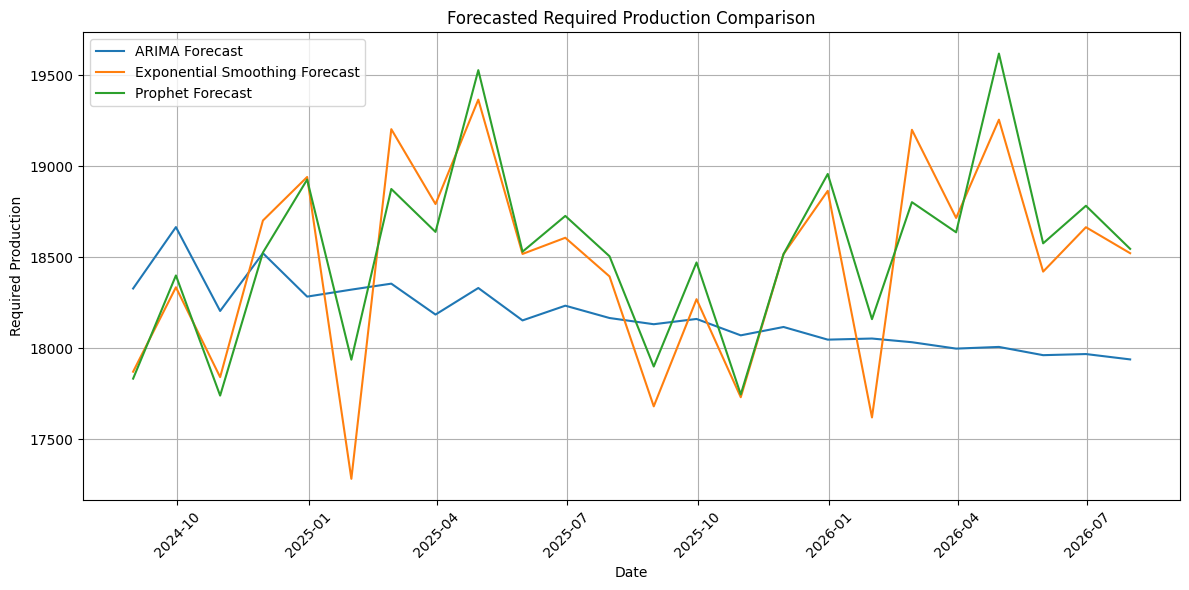

In [ ]:
# Plot combined forecast
plt.figure(figsize=(12, 6))

# Plot ARIMA forecast
plt.plot(combined_forecasts['Date'], combined_forecasts['ARIMA Forecast'], label='ARIMA Forecast')

# Plot Exponential Smoothing forecast
plt.plot(combined_forecasts['Date'], combined_forecasts['Exponential Smoothing Forecast'], label='Exponential Smoothing Forecast')

# Plot Prophet forecast
plt.plot(combined_forecasts['Date'], combined_forecasts['Prophet Forecast'], label='Prophet Forecast')

# Formatting the plot
plt.title('Forecasted Required Production Comparison')
plt.xlabel('Date')
plt.ylabel('Required Production')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Supply-Demand Analysis

In [ ]:
# Calculate the total demand as sum of farm use, imports, and domestic disappearance
df['Demand'] = df['Farm use'] + df['Imports'] + df['Domestic disappearance']

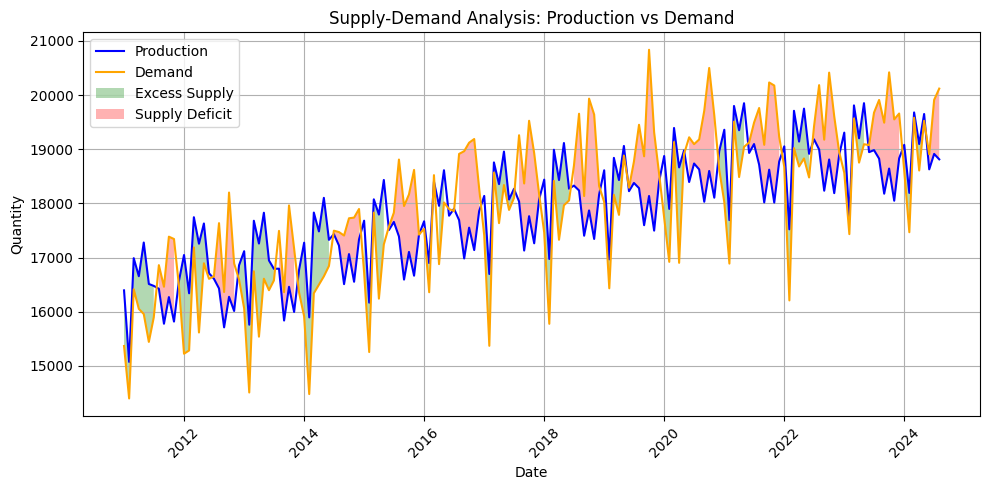

In [ ]:
# Visualize the Supply-Demand Analysis
plt.figure(figsize=(10, 5))
plt.plot(df['Production'], label='Production', color='blue')
plt.plot(df['Demand'], label='Demand', color='orange')

# Plot excess or deficit of production
plt.fill_between(df.index, df['Production'], df['Demand'], where=(df['Production'] > df['Demand']),
                 facecolor='green', alpha=0.3, label='Excess Supply')
plt.fill_between(df.index, df['Production'], df['Demand'], where=(df['Production'] < df['Demand']),
                 facecolor='red', alpha=0.3, label='Supply Deficit')

plt.title('Supply-Demand Analysis: Production vs Demand')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculating the Supply-Demand Ratio

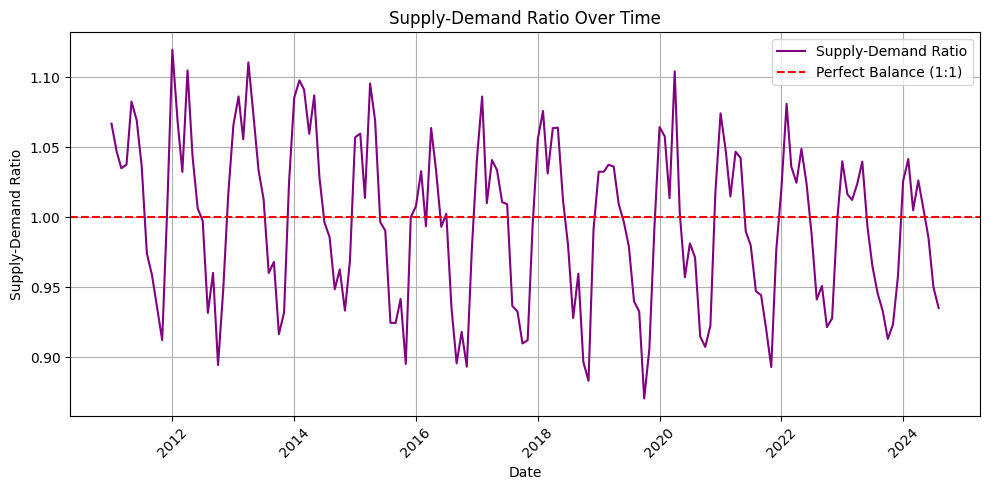

In [ ]:
# Calculate the Supply-Demand Ratio
df['Supply-Demand Ratio'] = df['Production'] / df['Demand']

# Plot the Supply-Demand Ratio
plt.figure(figsize=(10, 5))
plt.plot(df['Supply-Demand Ratio'], label='Supply-Demand Ratio', color='purple')
plt.axhline(y=1, color='red', linestyle='--', label='Perfect Balance (1:1)')
plt.title('Supply-Demand Ratio Over Time')
plt.xlabel('Date')
plt.ylabel('Supply-Demand Ratio')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
# Show a summary of how often production exceeds or falls short of demand
excess_supply_count = len(df[df['Production'] > df['Demand']])
supply_deficit_count = len(df[df['Production'] < df['Demand']])

print(f"Excess Supply: {excess_supply_count} periods")
print(f"Supply Deficit: {supply_deficit_count} periods")



Excess Supply: 84 periods
Supply Deficit: 80 periods


In [ ]:
# Display the last few rows for the Supply-Demand Ratio
print(df[['Production', 'Demand', 'Supply-Demand Ratio']].tail())

            Production   Demand  Supply-Demand Ratio
Date                                                
2024-04-01       19098  18609.0             1.026278
2024-05-01       19652  19527.0             1.006401
2024-06-01       18630  18908.0             0.985297
2024-07-01       18915  19913.0             0.949882
2024-08-01       18815  20121.0             0.935093


# Forecast Production with ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-33-5e1ca5373e72>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=25, freq='M')[1:], arima_forecast_values, label='ARIMA Forecast', color='red')


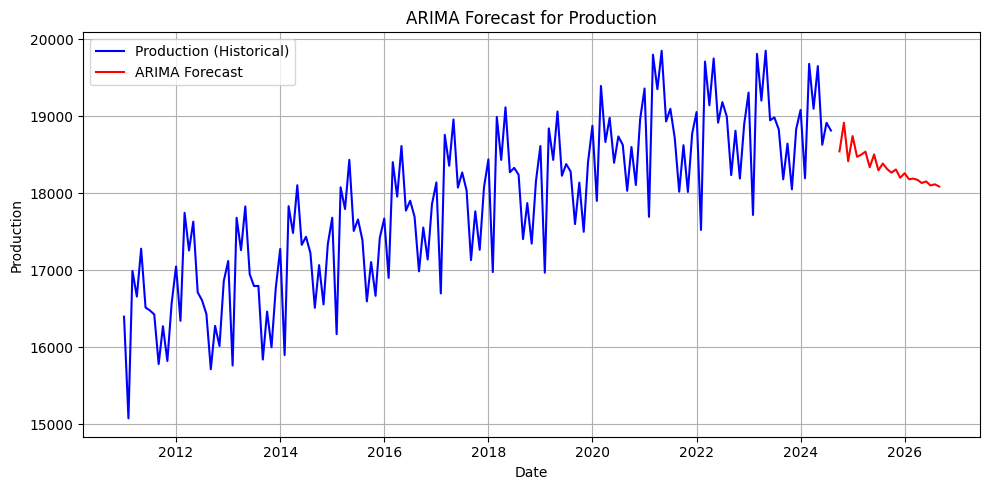

In [ ]:
# ARIMA Forecasting
def arima_forecast(series, order=(5, 0, 1), steps=24):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Forecast Production with ARIMA
arima_forecast_values = arima_forecast(df['Production'], steps=24)

# Plotting ARIMA forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Production'], label='Production (Historical)', color='blue')
plt.plot(pd.date_range(df.index[-1], periods=25, freq='M')[1:], arima_forecast_values, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast for Production')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Forecast Production with Exponential Smoothing

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-34-5cf75f13e83f>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=25, freq='M')[1:], ets_forecast_values, label='ETS Forecast', color='green')


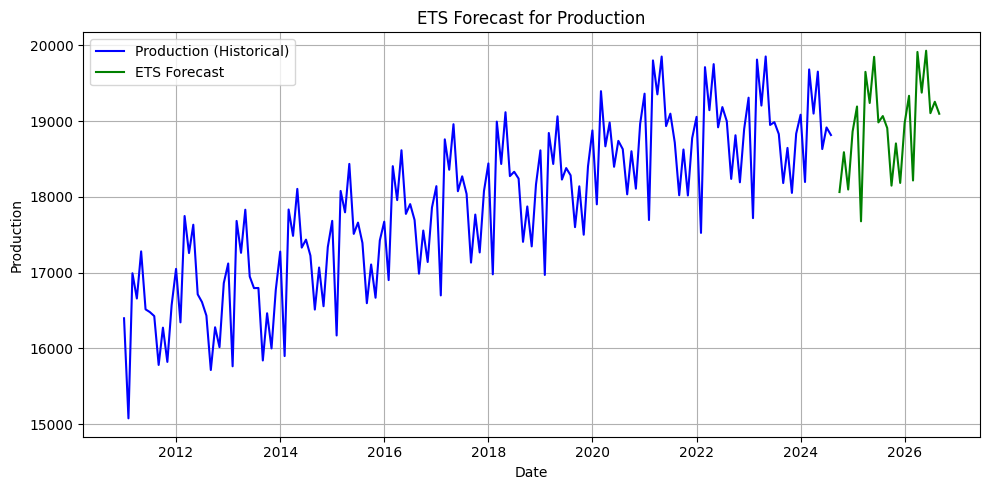

In [ ]:
# Exponential Smoothing (ETS) Forecasting
def ets_forecast(series, steps=24):
    model = ExponentialSmoothing(series, trend='add', seasonal='add', seasonal_periods=24)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Forecast Production with ETS
ets_forecast_values = ets_forecast(df['Production'], steps=24)

# Plotting ETS forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Production'], label='Production (Historical)', color='blue')
plt.plot(pd.date_range(df.index[-1], periods=25, freq='M')[1:], ets_forecast_values, label='ETS Forecast', color='green')
plt.title('ETS Forecast for Production')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Forecast Production with Prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn6cfinn1/idqrvz9o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn6cfinn1/sdda0iv0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20245', 'data', 'file=/tmp/tmpn6cfinn1/idqrvz9o.json', 'init=/tmp/tmpn6cfinn1/sdda0iv0.json', 'output', 'file=/tmp/tmpn6cfinn1/prophet_modeldwbps9ol/prophet_model-20241125065302.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:53:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:53:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

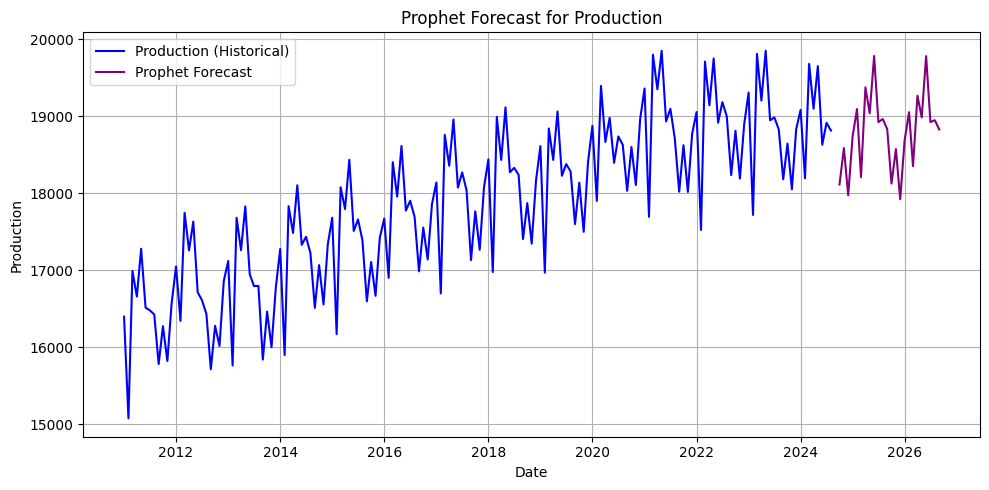

In [ ]:
# Prophet Forecasting
def prophet_forecast(series, steps=24):
    df_prophet = series.reset_index().rename(columns={'Date': 'ds', 'Production': 'y'})

    model = Prophet()
    model.fit(df_prophet)

    # Generate future dates for the forecast period (just pass 'periods=steps')
    # The following line is modified to remove the df_prophet argument
    future = model.make_future_dataframe(periods=steps, freq='M')  # Assuming monthly data
    forecast = model.predict(future)

    return forecast['yhat'][-steps:]

# Forecast Production with Prophet
prophet_forecast_values = prophet_forecast(df['Production'], steps=24)

# Plotting Prophet forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Production'], label='Production (Historical)', color='blue')
plt.plot(pd.date_range(df.index[-1], periods=25, freq='M')[1:], prophet_forecast_values, label='Prophet Forecast', color='purple')
plt.title('Prophet Forecast for Production')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-36-4f407f5cb2ec>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(df.index[-1], periods=25, freq='M')[1:]


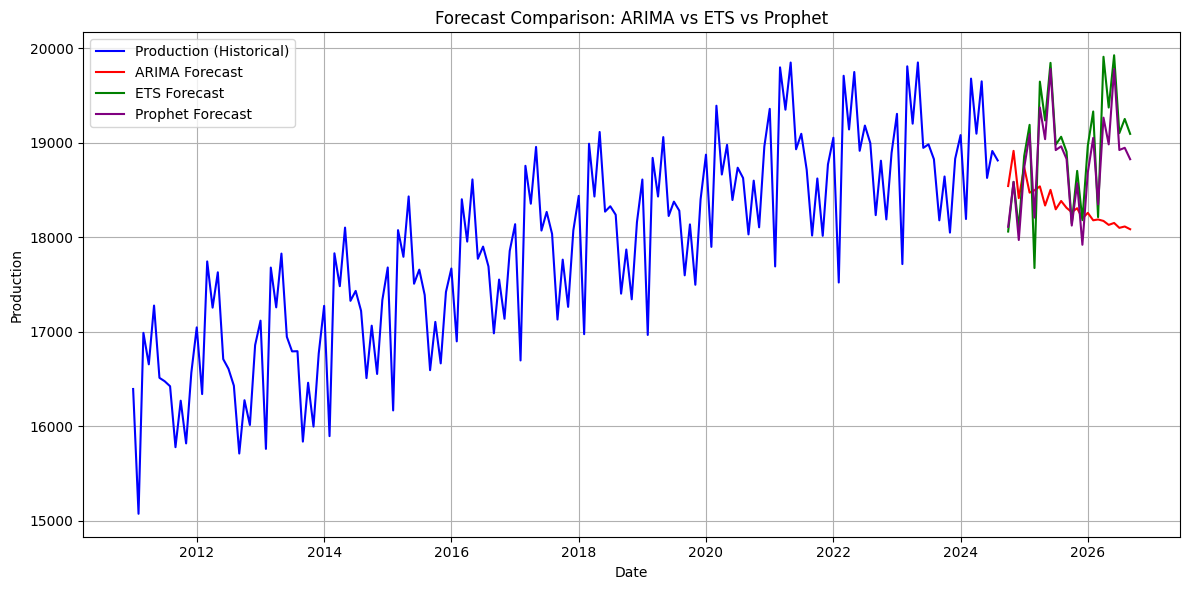

In [ ]:
# Combine all forecasts into a DataFrame for comparison
forecast_dates = pd.date_range(df.index[-1], periods=25, freq='M')[1:]
forecast_df = pd.DataFrame({
    'ARIMA Forecast': arima_forecast_values.values,
    'ETS Forecast': ets_forecast_values.values,
    'Prophet Forecast': prophet_forecast_values.values
}, index=forecast_dates)

# Plot all forecasts
plt.figure(figsize=(12, 6))
plt.plot(df['Production'], label='Production (Historical)', color='blue')
plt.plot(forecast_df.index, forecast_df['ARIMA Forecast'], label='ARIMA Forecast', color='red')
plt.plot(forecast_df.index, forecast_df['ETS Forecast'], label='ETS Forecast', color='green')
plt.plot(forecast_df.index, forecast_df['Prophet Forecast'], label='Prophet Forecast', color='purple')
plt.title('Forecast Comparison: ARIMA vs ETS vs Prophet')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-37-2a3322621841>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(df.index[-1], periods=25, freq='M')[1:]


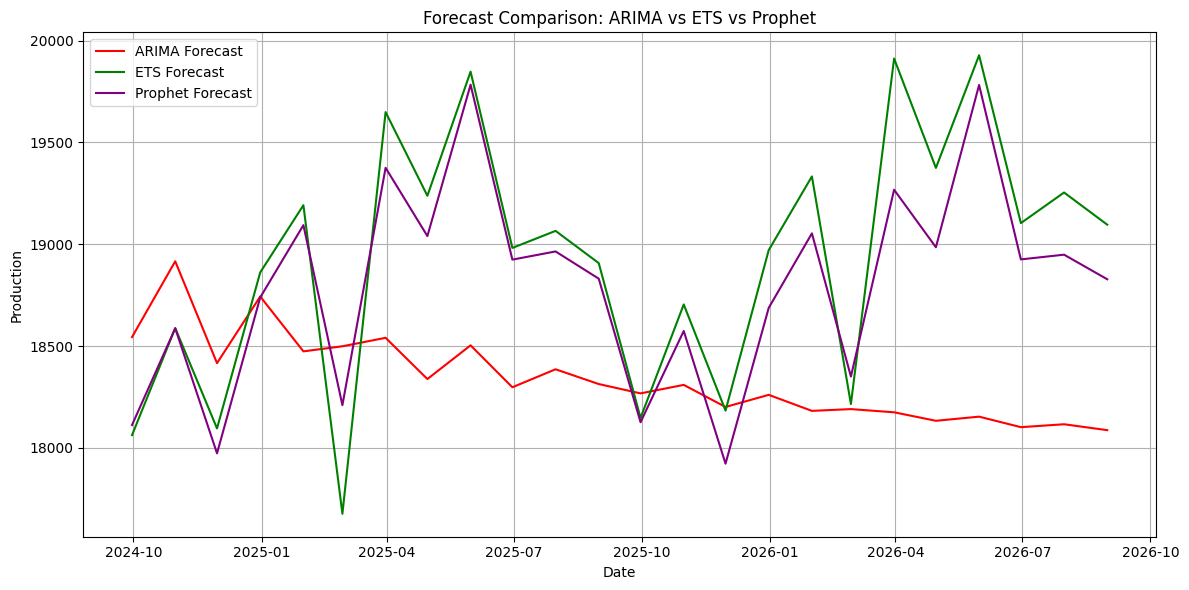

In [ ]:
# Combine all forecasts into a DataFrame for comparison
forecast_dates = pd.date_range(df.index[-1], periods=25, freq='M')[1:]
forecast_df = pd.DataFrame({
    'ARIMA Forecast': arima_forecast_values.values,
    'ETS Forecast': ets_forecast_values.values,
    'Prophet Forecast': prophet_forecast_values.values
}, index=forecast_dates)

# Plot only the forecasts
plt.figure(figsize=(12, 6))
plt.plot(forecast_df.index, forecast_df['ARIMA Forecast'], label='ARIMA Forecast', color='red')
plt.plot(forecast_df.index, forecast_df['ETS Forecast'], label='ETS Forecast', color='green')
plt.plot(forecast_df.index, forecast_df['Prophet Forecast'], label='Prophet Forecast', color='purple')
plt.title('Forecast Comparison: ARIMA vs ETS vs Prophet')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Import the necessary library
from sklearn.metrics import mean_squared_error

# Calculate RMSE for each model (if you have a test dataset)
# Here, we compare RMSE against historical data. If test data is available, this should be done accordingly.
y_true = df['Production'][-24:]  # Assuming we use the last 14 data points for evaluation
arima_rmse = mean_squared_error(y_true, arima_forecast_values, squared=False)
ets_rmse = mean_squared_error(y_true, ets_forecast_values, squared=False)
prophet_rmse = mean_squared_error(y_true, prophet_forecast_values, squared=False)

print(f"ARIMA RMSE: {arima_rmse:.4f}")
print(f"ETS RMSE: {ets_rmse:.4f}")
print(f"Prophet RMSE: {prophet_rmse:.4f}")

ARIMA RMSE: 787.7743
ETS RMSE: 190.9966
Prophet RMSE: 204.9282


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Inventory Optimization

In [ ]:
# Target: Ending Stocks
y = df['Ending stocks']


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Check stationarity with ADF test
adf_test = adfuller(y)
print(f"ADF Statistic: {adf_test[0]:.4f}, p-value: {adf_test[1]:.4f}")

ADF Statistic: -1.8867, p-value: 0.3383


In [ ]:
# If non-stationary (p-value > 0.05), take differences
if adf_test[1] > 0.05:
    y_diff = y.diff().dropna()
else:
    y_diff = y

# Fit ARIMA model
arima_model = ARIMA(y, order=(5, 0, 1))  # Adjust order after testing
arima_fitted = arima_model.fit()

# Forecast for the next 24 months
arima_forecast = arima_fitted.forecast(steps=24)
print("ARIMA Forecast:")
print(arima_forecast)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA Forecast:
2024-09-01    16256.804577
2024-10-01    15703.327818
2024-11-01    15361.825676
2024-12-01    15162.159284
2025-01-01    15089.164474
2025-02-01    15100.831338
2025-03-01    15141.943312
2025-04-01    15193.635559
2025-05-01    15231.456487
2025-06-01    15252.234312
2025-07-01    15257.207775
2025-08-01    15250.465998
2025-09-01    15238.851999
2025-10-01    15226.316980
2025-11-01    15216.137519
2025-12-01    15209.427912
2026-01-01    15206.037178
2026-02-01    15205.255706
2026-03-01    15205.983851
2026-04-01    15207.347751
2026-05-01    15208.692477
2026-06-01    15209.673989
2026-07-01    15210.203770
2026-08-01    15210.335854
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
# Fit the Exponential Smoothing model
es_model = ExponentialSmoothing(
    y, trend='add', seasonal=None, initialization_method='estimated'
)
es_fitted = es_model.fit()

# Forecast for the next 24 months
es_forecast = es_fitted.forecast(steps=24)
print("Exponential Smoothing Forecast:")
print(es_forecast)


Exponential Smoothing Forecast:
2024-09-01    16184.609640
2024-10-01    15519.068655
2024-11-01    14853.527670
2024-12-01    14187.986685
2025-01-01    13522.445701
2025-02-01    12856.904716
2025-03-01    12191.363731
2025-04-01    11525.822746
2025-05-01    10860.281761
2025-06-01    10194.740776
2025-07-01     9529.199791
2025-08-01     8863.658806
2025-09-01     8198.117821
2025-10-01     7532.576836
2025-11-01     6867.035851
2025-12-01     6201.494867
2026-01-01     5535.953882
2026-02-01     4870.412897
2026-03-01     4204.871912
2026-04-01     3539.330927
2026-05-01     2873.789942
2026-06-01     2208.248957
2026-07-01     1542.707972
2026-08-01      877.166987
Freq: MS, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# Prepare data for Prophet
prophet_data = df.reset_index()[['Date', 'Ending stocks']].rename(columns={'Date': 'ds', 'Ending stocks': 'y'})

# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_data)

# Create a future dataframe for the next 24 months
future = prophet_model.make_future_dataframe(periods=24, freq='M')

# Forecast
prophet_forecast = prophet_model.predict(future)
print("Prophet Forecast:")
print(prophet_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn6cfinn1/kq0fi7r0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn6cfinn1/ib0s722d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70938', 'data', 'file=/tmp/tmpn6cfinn1/kq0fi7r0.json', 'init=/tmp/tmpn6cfinn1/ib0s722d.json', 'output', 'file=/tmp/tmpn6cfinn1/prophet_modely1sahbvx/prophet_model-20241125071453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet Forecast:
            ds          yhat    yhat_lower    yhat_upper
176 2025-08-31  15703.302765  14704.151220  16681.486748
177 2025-09-30  14454.321548  13451.599938  15411.625694
178 2025-10-31  12878.774095  11921.709047  13835.162120
179 2025-11-30  12799.109622  11862.599134  13724.113755
180 2025-12-31  14246.693845  13326.744082  15192.416759
181 2026-01-31  15414.884088  14450.589851  16340.499930
182 2026-02-28  15335.429695  14412.440771  16269.417295
183 2026-03-31  15620.723878  14683.631301  16557.795390
184 2026-04-30  17288.910052  16350.498417  18239.523681
185 2026-05-31  17744.419986  16825.076381  18750.324230
186 2026-06-30  17549.095512  16507.513772  18469.516236
187 2026-07-31  16242.625983  15310.682105  17202.939434


/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


<ipython-input-46-4e6e8ecd23b7>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=y.index[-1], periods=24, freq='M')


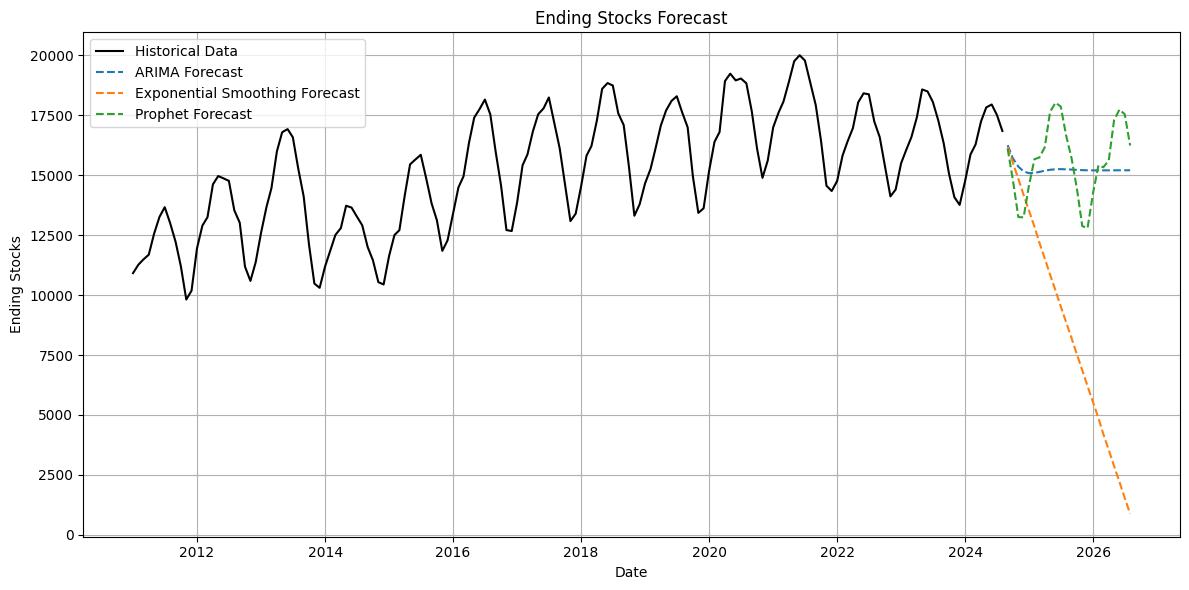

In [ ]:
# Combine forecasts into a single DataFrame
forecast_dates = pd.date_range(start=y.index[-1], periods=24, freq='M')
combined_forecast = pd.DataFrame({
    'Date': forecast_dates,
    'ARIMA': arima_forecast.values,
    'Exponential Smoothing': es_forecast.values,
    'Prophet': prophet_forecast.set_index('ds')['yhat'][-24:].values
})

# Plot original data and forecasts
plt.figure(figsize=(12, 6))
plt.plot(y, label='Historical Data', color='black')
plt.plot(forecast_dates, combined_forecast['ARIMA'], label='ARIMA Forecast', linestyle='--')
plt.plot(forecast_dates, combined_forecast['Exponential Smoothing'], label='Exponential Smoothing Forecast', linestyle='--')
plt.plot(forecast_dates, combined_forecast['Prophet'], label='Prophet Forecast', linestyle='--')

plt.title('Ending Stocks Forecast')
plt.xlabel('Date')
plt.ylabel('Ending Stocks')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-47-56638f06ad38>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=y.index[-1] + pd.DateOffset(1), periods=24, freq='M')


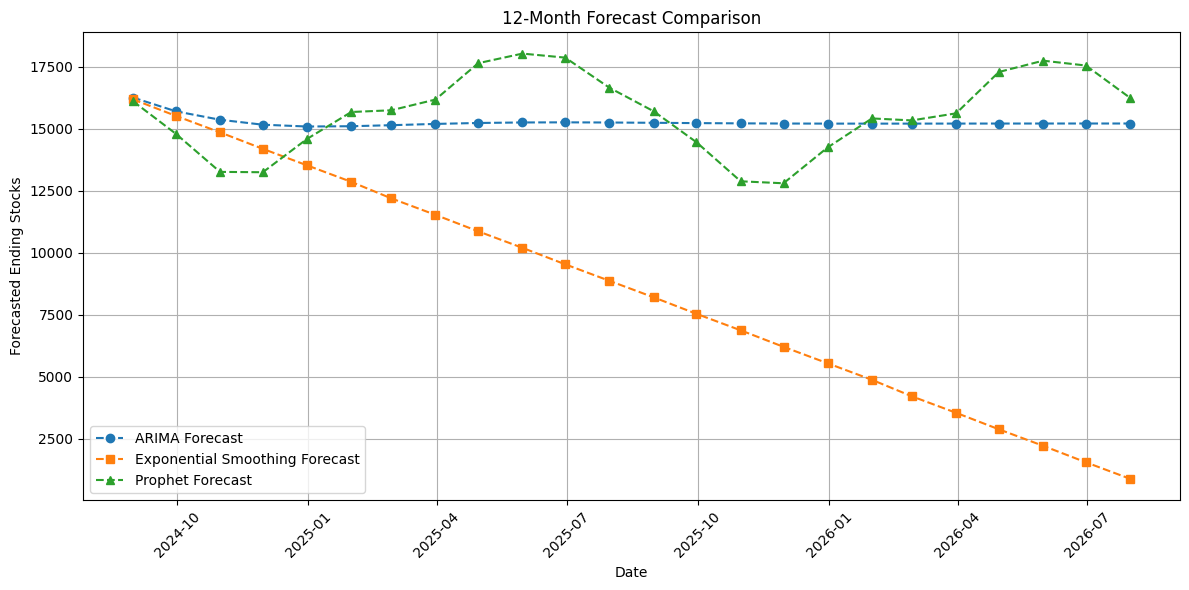

In [ ]:
# Combine only forecasted values into a DataFrame
forecast_dates = pd.date_range(start=y.index[-1] + pd.DateOffset(1), periods=24, freq='M')
forecast_only = pd.DataFrame({
    'Date': forecast_dates,
    'ARIMA': arima_forecast.values,
    'Exponential Smoothing': es_forecast.values,
    'Prophet': prophet_forecast.set_index('ds')['yhat'][-24:].values
})

# Plot the forecasts
plt.figure(figsize=(12, 6))

# ARIMA forecast
plt.plot(forecast_only['Date'], forecast_only['ARIMA'], label='ARIMA Forecast', linestyle='--', marker='o')

# Exponential Smoothing forecast
plt.plot(forecast_only['Date'], forecast_only['Exponential Smoothing'], label='Exponential Smoothing Forecast', linestyle='--', marker='s')

# Prophet forecast
plt.plot(forecast_only['Date'], forecast_only['Prophet'], label='Prophet Forecast', linestyle='--', marker='^')

# Add title and labels
plt.title('24-Month Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Forecasted Ending Stocks')
plt.legend()

# Improve x-tick formatting for better readability
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
